## How Much of the World Has Access to the Internet?

Now let's now move on to the competition and challenge.

## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.

_Note:  [This](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) is how the World Bank defines the different regions._

## 🧑‍⚖️ Judging criteria  

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 85%       | <ul><li> Accuracy (30%) - The response must be representative of the original data and free from errors.</li><li> Clarity (25%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (30%) - The response must be a full report that responds to the question posed.</li></ul>       |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, earlier submission time will be used as a tie-breaker. 

## ⌛️ Time is ticking. Good luck!

<h1>Cleaning the dataset </h1>

In [57]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
#loading data
def load_data(data_name):
    path = f"/Users/kpaul/OneDrive/code/github/Project/data_analysis/How Much of the World Has Access to the Internet/data/{data_name}.csv"
    return pd.read_csv(path)


broadband = load_data('broadband')
internet = load_data('internet')
people = load_data('people')

In [59]:
#first look on the dataframes

print('broadband:\n', broadband)
print('internet:\n', internet)
print('people:\n', people)

broadband:
            Entity Code  Year  Broadband_Subscriptions
0     Afghanistan  AFG  2004                 0.000809
1     Afghanistan  AFG  2005                 0.000858
2     Afghanistan  AFG  2006                 0.001892
3     Afghanistan  AFG  2007                 0.001845
4     Afghanistan  AFG  2008                 0.001804
...           ...  ...   ...                      ...
3883     Zimbabwe  ZWE  2016                 1.217633
3884     Zimbabwe  ZWE  2017                 1.315694
3885     Zimbabwe  ZWE  2018                 1.406322
3886     Zimbabwe  ZWE  2019                 1.395818
3887     Zimbabwe  ZWE  2020                 1.368916

[3888 rows x 4 columns]
internet:
            Entity Code  Year  Internet_Usage
0     Afghanistan  AFG  1990        0.000000
1     Afghanistan  AFG  1991        0.000000
2     Afghanistan  AFG  1992        0.000000
3     Afghanistan  AFG  1993        0.000000
4     Afghanistan  AFG  1994        0.000000
...           ...  ...   ...      

In [60]:
# check na values
data_frames = [broadband, internet, people]

def count_na_values(data_frames):
    for df in data_frames:
        display( round(df.isnull().sum()/ len(df) * 100 , 2))
count_na_values(data_frames)

Entity                     0.00
Code                       6.97
Year                       0.00
Broadband_Subscriptions    0.00
dtype: float64

Entity             0.00
Code              18.73
Year               0.00
Internet_Usage     0.00
dtype: float64

Entity    0.00
Code      4.81
Year      0.00
Users     0.00
dtype: float64

In [61]:
#dropind na values 
for df in data_frames:
    df = df.dropna(inplace=True)
count_na_values(data_frames)

Entity                     0.0
Code                       0.0
Year                       0.0
Broadband_Subscriptions    0.0
dtype: float64

Entity            0.0
Code              0.0
Year              0.0
Internet_Usage    0.0
dtype: float64

Entity    0.0
Code      0.0
Year      0.0
Users     0.0
dtype: float64

In [62]:
#reset all index
for df in data_frames:
    df = df.reset_index(drop = True)


<h1>1. What are the top 5 countries with the highest internet use (by population share)?</h1>

In [63]:
internet

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [73]:
internet.groupby(['Entity', 'Year', ])['Internet_Usage'].sum().sort_values(ascending=False)

Entity                Year
Bahrain               2019    99.701504
Qatar                 2018    99.652849
                      2019    99.652804
Kuwait                2018    99.598850
Liechtenstein         2017    99.546612
                                ...    
Micronesia (country)  1993     0.000000
                      1992     0.000000
                      1991     0.000000
                      1990     0.000000
Lebanon               1993     0.000000
Name: Internet_Usage, Length: 5761, dtype: float64

In [71]:
top_5_internet_usage = internet.nlargest(5, 'Internet_Usage')
top_5_internet_usage

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5387,Qatar,QAT,2018,99.652849
5388,Qatar,QAT,2019,99.652804
3415,Kuwait,KWT,2018,99.598850
3767,Liechtenstein,LIE,2017,99.546612


<AxesSubplot:xlabel='Entity', ylabel='Internet_Usage'>

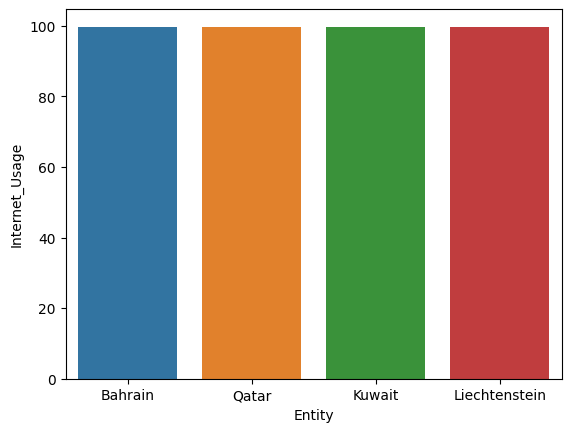

In [76]:
sns.barplot(data = top_5_internet_usage, x = 'Entity' , y ='Internet_Usage' )